<center>
<img src="https://2223moodle.isel.pt/pluginfile.php/1/theme_adaptable/logo/1631635830/logo-isel_inv3.png" width="250">
<h3>Licenciatura em Engenharia Informática e Multimédia</h3><br>
Ano Letivo 2023/2024<br>
<h3>Aprendizagem Automaática (AA)</h3>
<h3>Projeto Final - Rate Beer Dataset</h3> 


<center> 
<br>
Ricardo Vieira <b>A45871</b><br>
Eduardo Marques <b>A45977</b><br>
Turma 52D<br><br>
Docente: Engenheiro Gonçalo Xufre<br> 
21 de Janeiro 2024
</center>
</center>

***
<br>
<a id='section0'></a>
<center><h2><b>Índice</b></h2></center>


In [2]:
# Bibliotecas Permitidas - Não se podem acrescentar mais!
import cv2 # OpenCV
import itertools
import nltk
import pandas
import pickle
import re
import sklearn
import time

import numpy             as np
import scipy.linalg      as la
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

***
<a id='section1'/></a>
# <center>[←](#section0) [Índice](#section0) [→](#section1)<br><br>Funções auxiliares<b></b></center>

## Funções e Variáveis Auxiliares
Nesta secção, apresenta-se uma série de funções auxiliares.

In [3]:
# Recebe o nome de um ficheiro que contenha informação a ser lida como pickle.
def openFile(filename):
    return pickle.load(open(filename, 'rb'))


# Recebe um array com um ou mais documentos, limpando-os de forma a conter apenas em caracteres alfabéticos sem acentos.
# Flag binary, por omissão a 0, indica a necessidade de descodificação binária
def cleanFile(documentos, binary=False):
    #Converte strings binárias para strings normais
    if binary:
        documentos = [doc.decode('UTF-8') for doc in documentos]
        
    #Remove marcas html de mudança de linha
    documentos = [doc.replace('<br />', ' ') for doc in documentos]
    
    #Elimina todos os caracteres que não sejam alfabéticos
    documentos = [re.sub('[^a-zA-Z0-9\u00C0-\u00FF/]' , ' ', doc) for doc in documentos]
    
    return documentos

***
<a id='section2'/></a>
# <center>[←](#section1) [Índice](#section0) [→](#section3)<br><br>Desenvolvimento<b></b></center>

Começamos pela obtenção e estudo dos dados fornecidos.

In [4]:
D_train = openFile('rateBeer75Ktrain.p')
D_test = openFile('rateBeer25Ktest.p')

Text(0.5, 0, 'Classificação')

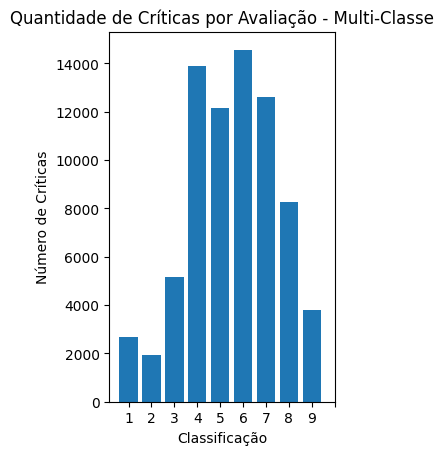

In [21]:
# X de treino
X1 = np.array([value["review"] for value in D_train.values()])
# y de treino
y1Feel = np.array([value["feel"][0] for value in D_train.values()])
y1Look = np.array([value["look"][0] for value in D_train.values()])
y1Smell = np.array([value["smell"][0] for value in D_train.values()])
y1Taste = np.array([value["taste"][0] for value in D_train.values()])
y1Overall = np.array([value["overall"][0] for value in D_train.values()])

# X de teste
X2 = np.array([value["review"] for value in D_test.values()])
# y de teste
y2Feel = np.array([value["feel"][0] for value in D_test.values()])
y2Look = np.array([value["look"][0] for value in D_test.values()])
y2Smell = np.array([value["smell"][0] for value in D_test.values()])
y2Taste = np.array([value["taste"][0] for value in D_test.values()])
y2Overall = np.array([value["overall"][0] for value in D_test.values()])

labels, counts = np.unique(y1Overall, return_counts=True)

plt.subplot(121)
plt.title('Quantidade de Críticas por Avaliação - Multi-Classe')
plt.bar(labels, counts, align='center')
plt.xticks(np.arange(0, 10, step=1))
plt.ylabel('Número de Críticas')
plt.xlabel('Classificação')


In [23]:
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
# Limpeza das criticas
print('Crítica Conforme Lida: \n', X1[1])
print()
Docs_train = cleanFile(X1)
print('Crítica Após Limpeza: \n', X1[1])

Docs_test = cleanFile(X2)

# Stemming das criticas
porterStemFunc = PorterStemmer()
Docs_train_PorterStem = [' '.join([porterStemFunc.stem(word) for word in doc.split()]) for doc in Docs_train]
Docs_test_PorterStem = [' '.join([porterStemFunc.stem(word) for word in doc.split()]) for doc in Docs_test]
print("PorterStemmer")

snowballSteamFunc = SnowballStemmer('english')
Docs_test_SnowballStem = [' '.join([snowballSteamFunc.stem(word) for word in doc.split()]) for doc in Docs_test]
Docs_train_SnowballStem = [' '.join([snowballSteamFunc.stem(word) for word in doc.split()]) for doc in Docs_train]
print("SnowballStemmer")

lancasterStemFunc = LancasterStemmer()
Docs_test_LancasterStem = [' '.join([lancasterStemFunc.stem(word) for word in doc.split()]) for doc in Docs_test]
Docs_train_LancasterStem = [' '.join([lancasterStemFunc.stem(word) for word in doc.split()]) for doc in Docs_train]
print("LancasterStemmer")

Crítica Conforme Lida: 
 Compliments of a trade with goldtwins  thanks  Poured dark with very little head   Coffee bean and chocolate dominate from the start  slight sweetness in the middle and finishes with a bit of bitterness from the coffee   A nice hefty porter for the winter months 

Crítica Após Limpeza: 
 Compliments of a trade with goldtwins  thanks  Poured dark with very little head   Coffee bean and chocolate dominate from the start  slight sweetness in the middle and finishes with a bit of bitterness from the coffee   A nice hefty porter for the winter months 


KeyboardInterrupt: 